# NBA 2020-2021 Regular Season Data Analysis

Use the "Run" button to execute the code.

In [12]:
!pip install jovian --upgrade --quiet

In [13]:
import jovian

# 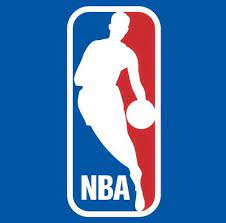

# About

This is a course project for "Data Analysis with Python: Zero to Pandas" course. In this project I will be analyzing a dataset from Kaggle that includes player stats from NBA players that were tracked throughout the 2020-2021 regular season. This dataset includes the player's name, position, their points per game average, along with many other stats. This project will aim to use the original data to make more columns, graph data, and answer multiple questions about how players performed compared to others. The python packages that we will use to achieve this include pandas, numpy, matplotlib, and seaborn.

Dataset: https://www.kaggle.com/datasets/thomasjohnmahler/nba-player-season-stats

In [14]:
project_name = '2020-2021-regular-season-analysis'

In [15]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import opendatasets as od
import os
%matplotlib inline

# Data Preparation and Cleaning

In [17]:
od.download('https://www.kaggle.com/datasets/thomasjohnmahler/nba-player-season-stats') #Downloads folder from kaggle 

Skipping, found downloaded files in "./nba-player-season-stats" (use force=True to force download)


In [18]:
os.listdir('nba-player-season-stats') # Lists all the CSV files in folder

['2016-2017.csv',
 '2009-2010.csv',
 '2021-2022.csv',
 '2018-2019.csv',
 '2007-2008.csv',
 '2013-2014.csv',
 '2017-2018.csv',
 '2020-2021.csv',
 '2002-2003.csv',
 '2003-2004.csv',
 '2019-2020.csv',
 '1998-1999.csv',
 '2008-2009.csv',
 '2006-2007.csv',
 '2000-2001.csv',
 '2011-2012.csv',
 '2004-2005.csv',
 '2015-2016.csv',
 'combined_seasons.csv',
 '2005-2006.csv',
 'league_mvps.csv',
 '2001-2002.csv',
 '2012-2013.csv',
 '2010-2011.csv',
 '2014-2015.csv',
 '1999-2000.csv']

In [19]:
nba_df = pd.read_csv('nba-player-season-stats/2020-2021.csv') # Reading CSV
nba_df = nba_df.drop(['Rk', 'Season'], axis=1) # Dropping columns
nba_df = nba_df.rename(columns={'Tm':'Team'}) # Renaming column

In [20]:
nba_df.columns #Shows all columns in dataset

Index(['Player', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'isMVP'],
      dtype='object')

In [21]:
nba_df

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,0
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,0
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,0
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,0
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,0
536,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,0
537,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,0
538,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,0


In [22]:
#Calculating True Shooting Percentage
nba_df['TS%'] = (nba_df['PTS'] * 0.5) / (nba_df['FGA'] + (nba_df['FTA'] * 0.475)) 

Information about column names and data types:

In [23]:
nba_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  540 non-null    object 
 1   Pos     540 non-null    object 
 2   Age     540 non-null    int64  
 3   Team    540 non-null    object 
 4   G       540 non-null    int64  
 5   GS      540 non-null    int64  
 6   MP      540 non-null    float64
 7   FG      540 non-null    float64
 8   FGA     540 non-null    float64
 9   FG%     539 non-null    float64
 10  3P      540 non-null    float64
 11  3PA     540 non-null    float64
 12  3P%     521 non-null    float64
 13  2P      540 non-null    float64
 14  2PA     540 non-null    float64
 15  2P%     535 non-null    float64
 16  eFG%    539 non-null    float64
 17  FT      540 non-null    float64
 18  FTA     540 non-null    float64
 19  FT%     522 non-null    float64
 20  ORB     540 non-null    float64
 21  DRB     540 non-null    float64
 22  TR

In [24]:
nba_df.shape

(540, 31)

In [25]:
print('This data frame has {} rows and {} columns.'.format(nba_df.shape[0], nba_df.shape[1]))

This data frame has 540 rows and 31 columns.


In [26]:
nba_df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,539.000000,540.000000,540.00000,521.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,539.000000
mean,25.555556,42.692593,20.000000,19.820926,3.287963,7.162593,0.447703,1.002593,2.81500,0.312875,...,2.817222,3.635000,1.987593,0.617778,0.415000,1.093889,1.635185,8.942407,0.001852,0.541037
std,4.108305,20.706670,23.176183,9.308218,2.345228,4.830470,0.106992,0.904920,2.27559,0.126006,...,1.825845,2.392299,1.864952,0.387680,0.408555,0.837447,0.759005,6.483883,0.043033,0.101497
min,19.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,26.750000,1.000000,12.575000,1.575000,3.600000,0.403000,0.300000,0.97500,0.271000,...,1.475000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.100000,0.000000,0.509631
50%,25.000000,46.000000,8.000000,19.600000,2.800000,6.050000,0.442000,0.800000,2.30000,0.341000,...,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.350000,0.000000,0.550436
75%,28.000000,61.000000,38.000000,27.700000,4.600000,9.825000,0.496500,1.600000,4.32500,0.389000,...,3.800000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,12.400000,0.000000,0.592820
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.70000,1.000000,...,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000,1.000000,1.030928


In [27]:
total_fg = nba_df['FG'].sum()
print('Total field goals made was {}.'.format(total_fg))

Total field goals made was 1775.5.


- Age ranges from 19 to 40
- Mean three point percentage was 31%
- Minutes played per game ranges from 2 to 37.6
- Points per game ranges from 0 to 32
- Games played ranges from 0 to 72

# Exploratory Analysis and Visualization

In [28]:
mean_points = nba_df.PTS.mean() # Using mean function to find the average points per game
mean_assists = nba_df.AST.mean()# Using mean function to find the average assists per game
sum_blocks = nba_df.BLK.sum() # Usins the sum function to find the total blocks recorded in the season


In [29]:
print('The mean points per game was {} in the 2020-2021 regular season.'.format(mean_points))
print('The mean assists per game was {} in the 2020-2021 regular season.'.format(mean_assists))
print('The total blocks per game was {} in the 2020-2021 regular season.'.format(sum_blocks))

The mean points per game was 8.942407407407405 in the 2020-2021 regular season.
The mean assists per game was 1.9875925925925917 in the 2020-2021 regular season.
The total blocks per game was 224.1 in the 2020-2021 regular season.


Let's see if age and points per game are correlated within the Phoenix Suns.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


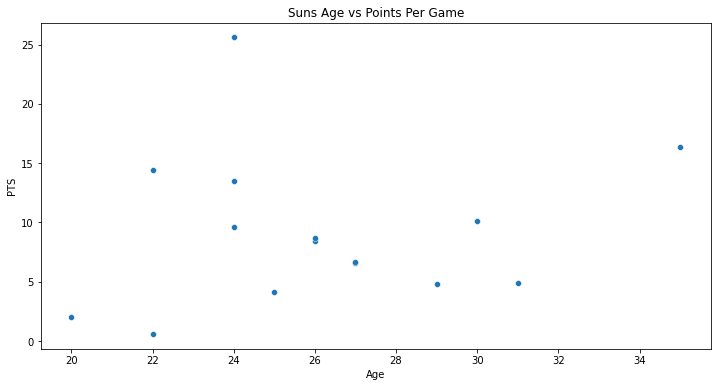

In [30]:
suns_df = nba_df.loc[nba_df['Team'] == 'PHO']
plt.figure(figsize=(12,6))
plt.title('Suns Age vs Points Per Game')
sns.set_style('darkgrid')
sns.scatterplot(suns_df.Age, suns_df.PTS);

Age and points per game did not have much correlation for the Phoenix Suns.

Let's find out which position tallied the most points per game in the 2020-2021 regualar season.

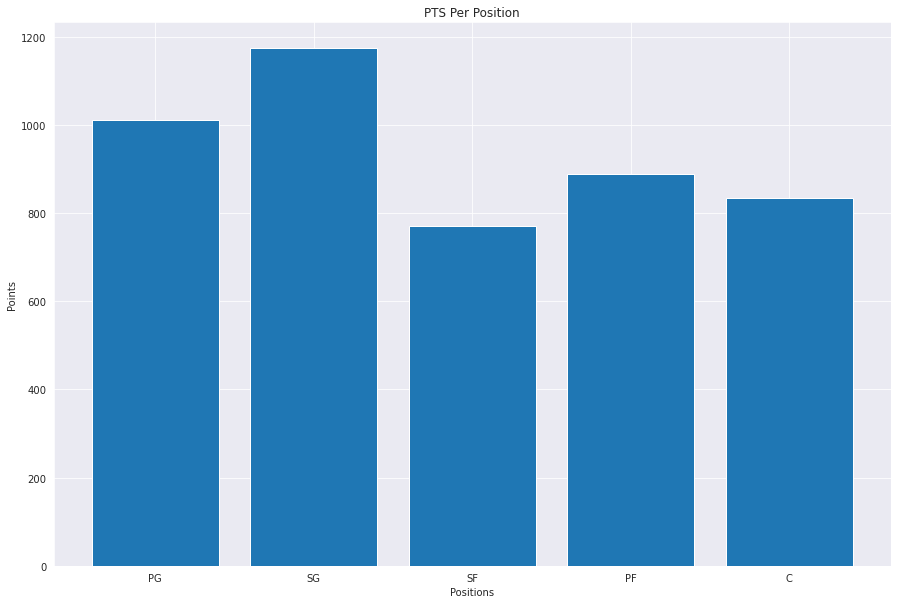

In [31]:
# Creating variables for each position
pg = (nba_df.loc[nba_df['Pos'] == 'PG'])
sg = (nba_df.loc[nba_df['Pos'] == 'SG'])
sf = (nba_df.loc[nba_df['Pos'] == 'SF'])
pf = (nba_df.loc[nba_df['Pos'] == 'PF'])
c = (nba_df.loc[nba_df['Pos'] == 'C'])
# X-values
positions = ['PG', 'SG', 'SF', 'PF', 'C']
# Y-valyes (each positions total points per game average)
points = [pg['PTS'].sum(), sg['PTS'].sum(), sf['PTS'].sum(), pf['PTS'].sum(), c['PTS'].sum()]
#Displaying bar graph
plt.figure(figsize=(15, 10))
plt.title('PTS Per Position')
plt.xlabel('Positions')
plt.ylabel('Points')
plt.bar(positions, points)
plt.show()

The graphs shows that shooting guards scored the most points in the 2020-2021 nba regular season.

Let's now see the distributions of assists in the 2020-2021 regular season.

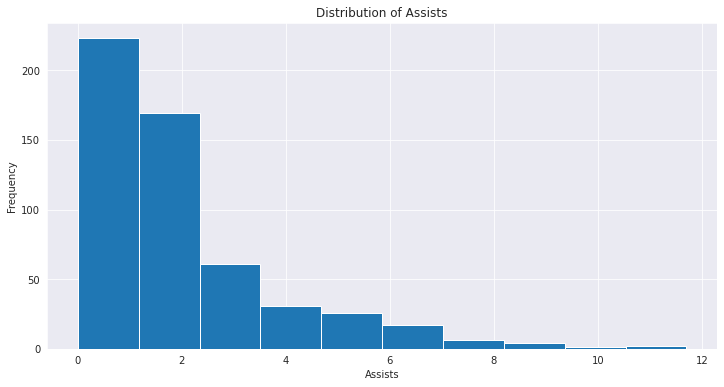

In [32]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Assists')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.hist(nba_df.AST);

This graph shows a lot of players that averaged 0-2 assists. Let's only show players that played at least 20 minutes per game to see if the distribution changes.

In [33]:
assists = nba_df.loc[nba_df.MP >= 20]
assists

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,0,0.594447
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,0,0.618693
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,0,0.550796
6,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,...,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0,0,0.515706
7,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,0.418,...,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6,0,0.578919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,...,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,0,0.557377
536,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,0,0.575779
537,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,0,0.579411
538,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,0,0.588419


263 rows now compared to 540 previously.

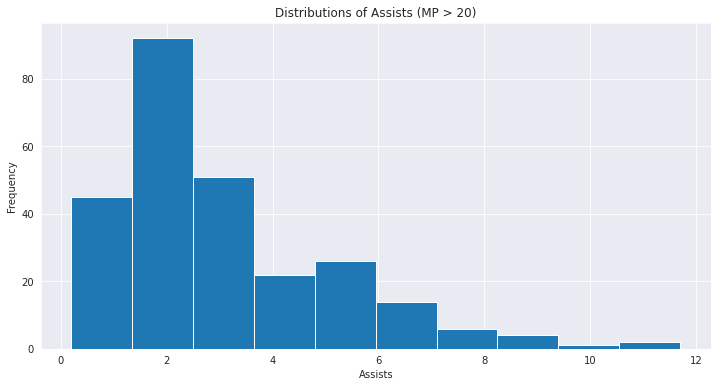

In [34]:
plt.figure(figsize=(12, 6))
plt.title('Distributions of Assists (MP > 20)')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.hist(assists.AST);

Constraint changed the distribution since it removed players that barely played.

Let's look at the correlation between minutes played and scoring between the two NBA teams that play in Los Angeles.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


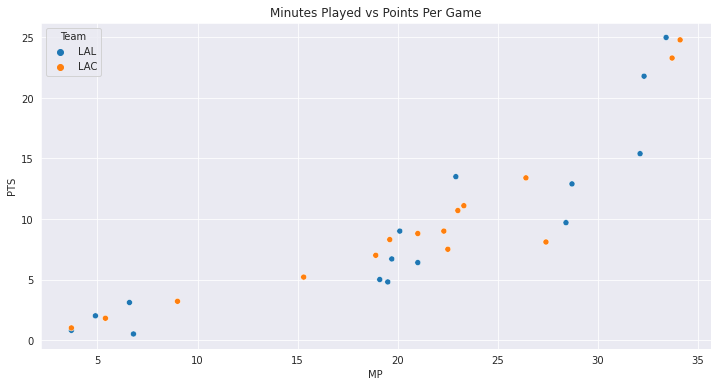

In [35]:
la_teams = nba_df.loc[(nba_df.Team == 'LAL') | (nba_df.Team == 'LAC')]
plt.figure(figsize=(12, 6))
plt.title('Minutes Played vs Points Per Game')
sns.set_style('darkgrid')
sns.scatterplot(la_teams.MP, la_teams.PTS, hue=la_teams.Team);


Both teams have exponentially positive correlations between minutes played and scoring.

# Questions

Q1: How Many centers were on a roster?

In [36]:
q1 = nba_df[nba_df.Pos == 'C']
print('There were {} centers on a roster.'.format(q1.shape[0]))
q1

There were 98 centers on a roster.


,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,0,0.594447
3,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,0,0.618693
4,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,0.473,...,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,0,0.550796
8,Jarrett Allen,C,22,TOT,63,45,29.6,4.7,7.7,0.618,...,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8,0,0.647446
21,Deandre Ayton,C,22,PHO,69,69,30.7,6.2,10.0,0.626,...,7.2,10.5,1.4,0.6,1.2,1.5,2.8,14.4,0,0.643575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Robert Williams,C,23,BOS,52,13,18.9,3.6,5.0,0.721,...,4.3,6.9,1.8,0.8,1.8,1.0,2.0,8.0,0,0.706090
532,James Wiseman,C,19,GSW,39,27,21.4,4.9,9.4,0.519,...,4.4,5.8,0.7,0.3,0.9,1.5,3.1,11.5,0,0.550503
533,Christian Wood,C,25,HOU,41,41,32.3,8.0,15.6,0.514,...,7.8,9.6,1.7,0.8,1.2,2.0,2.1,21.0,0,0.587248
538,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,0,0.588419


Q2: How Many Players Averaged at Least 18.5 Points and 7.5 Assists

In [37]:
q2 = nba_df.loc[(nba_df['PTS'] >= 18.5) & (nba_df['AST'] >= 7.5)]
print('There were {} players that averaged at least 18 points and 7.5 assists per game'.format(q2.shape[0]))
q2

There were 7 players that averaged at least 18 points and 7.5 assists per game


,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%
129,Luka Dončić,PG,21,DAL,66,66,34.3,9.8,20.5,0.479,...,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,0,0.580165
200,James Harden,PG-SG,31,TOT,44,43,36.6,7.8,16.7,0.466,...,7.1,7.9,10.8,1.2,0.8,4.0,2.3,24.6,0,0.609892
251,LeBron James,PG,36,LAL,45,45,33.4,9.4,18.3,0.513,...,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0,0,0.595026
262,Nikola Jokić,C,25,DEN,72,72,34.6,10.2,18.0,0.566,...,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,1,0.640388
296,Damian Lillard,PG,30,POR,67,67,35.8,9.0,19.9,0.451,...,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,0,0.617496
516,Russell Westbrook,PG,32,WAS,65,65,36.4,8.4,19.0,0.439,...,9.9,11.5,11.7,1.4,0.4,4.8,2.9,22.2,0,0.503630
537,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,0,0.579411


Q3: How Many Players Averaged at Least 25 Points Per Game while having a true shooting percentage of at least 57%

In [38]:
q3 = (nba_df.loc[(nba_df['PTS'] >= 25) & (nba_df['TS%'] >= .58)])
print('There were {} players that averaged at least 25 points and had a true shooting percentage of at least 58%.'.format(q3.shape[0]))
q3

There were 13 players that averaged at least 25 points and had a true shooting percentage of at least 58%.


,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%
11,Giannis Antetokounmpo,PF,26,MIL,61,61,33.0,10.3,18.0,0.569,...,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,0,0.624098
37,Bradley Beal,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,...,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,0,0.587077
57,Devin Booker,SG,24,PHO,67,67,33.9,9.3,19.2,0.484,...,3.7,4.2,4.3,0.8,0.2,3.1,2.7,25.6,0,0.581752
115,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,0,0.647970
129,Luka Dončić,PG,21,DAL,66,66,34.3,9.8,20.5,0.479,...,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,0,0.580165
139,Kevin Durant,PF,32,BRK,35,32,33.1,9.3,17.2,0.537,...,6.7,7.1,5.6,0.7,1.3,3.4,2.0,26.9,0,0.658346
145,Joel Embiid,C,26,PHI,51,51,31.1,9.0,17.6,0.513,...,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,0,0.628238
243,Kyrie Irving,PG,28,BRK,54,54,34.9,10.2,20.1,0.506,...,3.8,4.8,6.0,1.4,0.7,2.4,2.6,26.9,0,0.611364
251,LeBron James,PG,36,LAL,45,45,33.4,9.4,18.3,0.513,...,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0,0,0.595026
262,Nikola Jokić,C,25,DEN,72,72,34.6,10.2,18.0,0.566,...,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,1,0.640388


Q4: How Many Players Have an Assist to Turnover Ratio of at Least 2.5 and average at Least 4 Assists?

In [39]:
# First need to create new column that has each players assist to turnover ratio
nba_df['AST_TOV%'] = nba_df['AST'] / nba_df['TOV']

In [40]:
q4 = nba_df.loc[(nba_df['AST'] >= 7.5) & (nba_df['AST_TOV%'] >= 2.5)]
print('{} players averaged 7.5 and had an assist to turnover ratio of at least 2.5.'.format(q4.shape[0]))
q4

5 players averaged 7.5 and had an assist to turnover ratio of at least 2.5.


,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,isMVP,TS%,AST_TOV%
186,Draymond Green,PF,30,GSW,63,63,31.5,2.7,6.0,0.447,...,7.1,8.9,1.7,0.8,3.0,3.1,7.0,0,0.525131,2.966667
200,James Harden,PG-SG,31,TOT,44,43,36.6,7.8,16.7,0.466,...,7.9,10.8,1.2,0.8,4.0,2.3,24.6,0,0.609892,2.700000
262,Nikola Jokić,C,25,DEN,72,72,34.6,10.2,18.0,0.566,...,10.8,8.3,1.3,0.7,3.1,2.7,26.4,1,0.640388,2.677419
296,Damian Lillard,PG,30,POR,67,67,35.8,9.0,19.9,0.451,...,4.2,7.5,0.9,0.3,3.0,1.5,28.8,0,0.617496,2.500000
395,Chris Paul,PG,35,PHO,70,70,31.4,6.3,12.6,0.499,...,4.5,8.9,1.4,0.3,2.2,2.4,16.4,0,0.592700,4.045455


Q5: How Many Players are at Least 30 Years Old and Averaged at Least 28 Points Per Game?

In [41]:
q5 = nba_df.loc[(nba_df.Age >= 30) & (nba_df.PTS >= 28)]

In [42]:
print('There were {} players that were at least 30 years of age and averaged at least 28 points.'.format(q5.shape[0]))

There were 2 players that were at least 30 years of age and averaged at least 28 points.


In [43]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "euekpoh/2020-2021-regular-season-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/euekpoh/2020-2021-regular-season-analysis


'https://jovian.ai/euekpoh/2020-2021-regular-season-analysis'

# Inferences and Conclusions

This project helped us gather some basic information about the 2020-2021 NBA season. We can infer that more minutes lead to more stats for each category, shooting guards averaged the most points, assists are right skewed, among many others. The questions that I answered with querying have to do with what players score at a high volume, while doing it efficiently, and also what players are still elite scorers despite being above the average age. In conclusion, these basic stats can be used to make various visuals and queries that can result in endless inferences.

# References and Future Work

Thank you Thomas Malert for creating this dataset that contained all the stats from the 2020-2021 NBA regular season. I plan on continuing to do analysis on different NBA seasons. I might expand to college basketball or even other sports leagues like the NFL. I also plan on doing analysis on covid-19.

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>